In [4]:
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv('vnindex.csv')

import plotly.graph_objects as go


priceClose = df[['priceClose','date','priceHigh','priceLow','priceOpen']]
priceClose = priceClose[0:600]
priceClose['dt'] =  pd.to_datetime(priceClose['date'],format= '%Y-%m-%dT%H:%M:%S' )

print(priceClose)
# priceClose.set_index('dt', inplace=True)

# fig = go.Figure(data=[go.Candlestick(x=priceClose['dt'],
#                 open=priceClose['priceOpen'],
#                 high=priceClose['priceHigh'],
#                 low=priceClose['priceLow'],
#                 close=priceClose['priceClose'])])

# fig.update_layout(
#     autosize=True,
#     height=1500,    
#     margin=dict(
#         l=50,
#         r=50,
#         b=100,
#         t=100,
#         pad=4
#     ),
#     paper_bgcolor="LightSteelBlue",
# )

# # print(fig.)
# fig.show()


import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

my_year_month_fmt = mdates.DateFormatter('%m/%y')
priceClose.set_index('dt', inplace=True)
priceClose=priceClose.sort_index()
short_rolling = priceClose.rolling(window=20).mean()
short_rolling.head(20)

long_rolling = priceClose.rolling(window=100).mean()
long_rolling.tail()



start_date = '2022-01-01'
end_date = '2022-10-25'

df.reset_index(drop=True)
# priceClose.set_index('dt');




print(priceClose.index)
print(df.index)

print(priceClose[:].index)

fig, ax = plt.subplots(figsize=(16,9))


ax.plot(priceClose.loc[start_date:end_date, :].index, priceClose.loc[start_date:end_date, 'priceClose'], label='Price')
ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'priceClose'], label = '100-days SMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'priceClose'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)
# df.

# print(priceClose.loc[start_date:end_date, 'date'])

priceClose.head()


     priceClose                 date  priceHigh  priceLow  priceOpen  \
0       1028.01  2022-10-27T00:00:00    1028.01    990.48     994.82   
1        993.36  2022-10-26T00:00:00    1004.55    984.71    1000.71   
2        997.70  2022-10-25T00:00:00    1011.39    962.45     980.47   
3        986.15  2022-10-24T00:00:00    1023.51    977.41    1021.25   
4       1019.82  2022-10-21T00:00:00    1059.03   1013.69    1059.03   
..          ...                  ...        ...       ...        ...   
595      832.47  2020-06-15T00:00:00     868.16    832.47     867.52   
596      863.52  2020-06-12T00:00:00     863.52    841.44     841.85   
597      867.37  2020-06-11T00:00:00     903.70    867.37     900.48   
598      900.00  2020-06-10T00:00:00     902.69    890.30     898.78   
599      899.43  2020-06-09T00:00:00     904.89    898.87     902.26   

            dt  
0   2022-10-27  
1   2022-10-26  
2   2022-10-25  
3   2022-10-24  
4   2022-10-21  
..         ...  
595 2020-06-15  

DataError: Cannot aggregate non-numeric type: object

In [ ]:
import matplotlib.pyplot as plt

# Hàm để kiểm tra hướng của 3 điểm: 1: ngược chiều kim đồng hồ, -1: theo chiều kim đồng hồ, 0: thẳng hàng
def orientation(p1, p2, p3):
    val = (p2['y'] - p1['y']) * (p3['x'] - p2['x']) - (p2['x'] - p1['x']) * (p3['y'] - p2['y'])
    if val == 0:
        return 0  # Thẳng hàng
    return 1 if val > 0 else -1  # Ngược chiều kim đồng hồ hoặc theo chiều kim đồng hồ

# Hàm để thực hiện thuật toán Jarvis March
def convex_hull(points):
    # (giữ nguyên hàm convex_hull)

# Hàm để tính khoảng cách giữa hai điểm
def distance(p1, p2):
    return ((p2['x'] - p1['x'])**2 + (p2['y'] - p1['y'])**2)**0.5

# Ví dụ sử dụng
points = [
    { 'x': 1, 'y': 1 },
    { 'x': 2, 'y': 3 },
    { 'x': 3, 'y': 5 },
    { 'x': 1, 'y': 7 },
    { 'x': 5, 'y': 2 },
    { 'x': 7, 'y': 4 },
    { 'x': 4, 'y': 6 },
]

convex_hull_points = convex_hull(points)

# Sắp xếp các điểm trên đa giác theo tọa độ y giảm dần
sorted_points = sorted(convex_hull_points, key=lambda point: point['y'], reverse=True)

# Tách tọa độ x và y của các điểm trong đa giác lồi
convex_x = [point['x'] for point in convex_hull_points]
convex_y = [point['y'] for point in convex_hull_points]

# Tách tọa độ x và y của các điểm ban đầu
x = [point['x'] for point in points]
y = [point['y'] for point in points]

# Vẽ các điểm ban đầu
plt.scatter(x, y, color='blue', label='Các điểm ban đầu')

# Vẽ đa giác lồi (đường phía trên)
plt.plot(convex_x + [convex_x[0]], convex_y + [convex_y[0]], color='red', label='Đa giác lồi')

# Tìm cạnh dài nhất nằm phía dưới (màu tím)
longest_edge_below = distance(sorted_points[0], sorted_points[1])
longest_edge_below_points = (sorted_points[0], sorted_points[1])

for i in range(1, len(sorted_points)-1):
    edge_distance = distance(sorted_points[i], sorted_points[i+1])
    if edge_distance > longest_edge_below:
        longest_edge_below = edge_distance
        longest_edge_below_points = (sorted_points[i], sorted_points[i+1])

# Tìm cạnh dài nhất nằm phía trên (màu xanh)
longest_edge_above = distance(sorted_points[-1], sorted_points[-2])
longest_edge_above_points = (sorted_points[-1], sorted_points[-2])

for i in range(len(sorted_points)-2, 0, -1):
    edge_distance = distance(sorted_points[i], sorted_points[i-1])
    if edge_distance > longest_edge_above:
        longest_edge_above = edge_distance
        longest_edge_above_points = (sorted_points[i], sorted_points[i-1])

# Vẽ lại cạnh dài nhất nằm phía dưới (màu tím)
plt.plot([longest_edge_below_points[0]['x'], longest_edge_below_points[1]['x']],
         [longest_edge_below_points[0]['y'], longest_edge_below_points[1]['y']], color='purple', label='Cạnh dưới (màu tím)')

# Vẽ lại cạnh dài nhất nằm phía trên (màu xanh)
plt.plot([longest_edge_above_points[0]['x'], longest_edge_above_points[1]['x']],
         [longest_edge_above_points[0]['y'], longest_edge_above_points[1]['y']], color='green', label='Cạnh trên (màu xanh)')

plt.xlabel('Tọa độ x')
plt.ylabel('Tọa độ y')
plt.title('Đồ thị của các điểm và đa giác lồi (đường phía trên)')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import plotly.graph_objects as go
import numpy as np
import pandas as pd

df = pd.read_csv('../name/minmax.csv')


def zigzag(df, depth, deviation, backstep, pip_size):
    i = depth

    zigzag_buffer = pd.Series(
        0*df['Close'], name='ZigZag_' + str(depth) + "_" + str(deviation) + "_" + str(backstep))
    high_buffer = pd.Series(0*df['Close'])
    low_buffer = pd.Series(0*df['Close'])

    curlow = 0
    curhigh = 0
    lasthigh = 0
    lastlow = 0

    whatlookfor = 0

    lows = pd.Series(df['Low'].rolling(depth).min())
    highs = pd.Series(df['High'].rolling(depth).max())

    while i + 1 <= df.index[-1]:
        extremum = lows[i]
        if extremum == lastlow:
            extremum = 0
        else:
            lastlow = extremum
            if df.at[i, 'Low']-extremum > deviation*pip_size:                
                extremum = 0
            else:                
                for back in range(1, backstep + 1):
                    pos = i-back
                    if low_buffer[pos] != 0 and low_buffer[pos] > extremum:
                        low_buffer[pos] = 0

        if df.at[i, 'Low'] == extremum:
            low_buffer[i] = extremum
        else:
            low_buffer[i] = 0

        extremum = highs[i]
        if extremum == lasthigh:
            extremum = 0
        else:
            lasthigh = extremum
            if extremum - df.at[i, 'High'] > deviation*pip_size:
                extremum = 0
            else:
                for back in range(1, backstep + 1):
                    pos = i - back
                    if high_buffer[pos] != 0 and high_buffer[pos] < extremum:
                        high_buffer[pos] = 0

        if df.at[i, 'High'] == extremum:
            high_buffer[i] = extremum
        else:
            high_buffer[i] = 0

        i = i + 1

    lastlow = 0
    lasthigh = 0

    i = depth

    while i + 1 <= df.index[-1]:
        if whatlookfor == 0:
            if lastlow == 0 and lasthigh == 0:
                if high_buffer[i] != 0:
                    lasthigh = df.at[i, 'High']
                    lasthighpos = i
                    whatlookfor = -1
                    zigzag_buffer[i] = lasthigh
                if low_buffer[i] != 0:
                    lastlow = df.at[i, 'Low']
                    lastlowpos = i
                    whatlookfor = 1
                    zigzag_buffer[i] = lastlow
        elif whatlookfor == 1:
            if low_buffer[i] != 0 and low_buffer[i] < lastlow and high_buffer[i] == 0:
                zigzag_buffer[lastlowpos] = 0
                lastlowpos = i
                lastlow = low_buffer[i]
                zigzag_buffer[i] = lastlow
            if high_buffer[i] != 0 and low_buffer[i] == 0:
                lasthigh = high_buffer[i]
                lasthighpos = i
                zigzag_buffer[i] = lasthigh
                whatlookfor = -1
        elif whatlookfor == -1:
            if high_buffer[i] != 0 and high_buffer[i] > lasthigh and low_buffer[i] == 0:
                zigzag_buffer[lasthighpos] = 0
                lasthighpos = i
                lasthigh = high_buffer[i]
                zigzag_buffer[i] = lasthigh
            if low_buffer[i] != 0 and high_buffer[i] == 0:
                lastlow = low_buffer[i]
                lastlowpos = i
                zigzag_buffer[i] = lastlow
                whatlookfor = 1

        i = i + 1   

    df = df.join(zigzag_buffer)
    return df


priceClose = df[["date", "dealVolume", "priceAverage", "priceBasic", "priceClose",
                 "priceHigh", "priceLow", "priceOpen", "maxPriceHigh", "minPriceLow","ZigZag","ZigZag1"]]

# priceClose = priceClose[0:200]

# print(priceClose.size)
priceClose['dt'] = pd.to_datetime(
    priceClose['date'], format='%Y-%m-%dT%H:%M:%S')

# priceClose

df2 = pd.DataFrame(priceClose).rename(columns={'priceOpen': 'Open',
                                           'priceHigh': 'High',
                                           'priceLow': 'Low',
                                           'priceClose': 'Close'
                                           }).drop(columns=['dealVolume',
                                                            'priceAverage',
                                                            'maxPriceHigh',
                                                            'minPriceLow'
                                                            ]).dropna()

df2 = df2.dropna()


# print("=================================================")
# print(df.head())
# print("=================================================")

depth = 10
deviation = 5
backstep = 3
pip_size=1
keyName='ZigZag_'+str(depth)+'_'+str(deviation)+'_'+str(backstep)
df2 = zigzag(df2, depth, deviation, backstep, pip_size)


index = 0
# while index < len(priceClose):
#     index += 1
#     # print(priceClose["maxPriceHigh"][index])
#     if priceClose["maxPriceHigh"][index] == 0:
#         priceClose["maxPriceHigh"][index] = None
#     if priceClose["minPriceLow"][index] == 0:
#        priceClose["minPriceLow"][index] = None;


# priceClose.head()

# priceClose.set_index('dt', inplace=True)

# fig = go.Figure(data=[go.Candlestick(x=priceClose['dt'],
#                 open=priceClose['priceOpen'],
#                 high=priceClose['priceHigh'],
#                 low=priceClose['priceLow'],
#                 close=priceClose['priceClose'])])

# fig.update_layout(
#     autosize=True,
#     height=1500,
#     margin=dict(
#         l=50,
#         r=50,
#         b=100,
#         t=100,
#         pad=4
#     ),
#     paper_bgcolor="LightSteelBlue",
# )

# # print(fig.)
# fig.show()


%matplotlib inline
sns.set(style='darkgrid', context='talk', palette='Dark2')

my_year_month_fmt = mdates.DateFormatter('%m/%y')
priceClose.set_index('dt', inplace=True)
df2.set_index('dt', inplace=True)
priceClose = priceClose.sort_index()
short_rolling = priceClose.rolling(window=20).mean()
short_rolling.head(20)

long_rolling = priceClose.rolling(window=100).mean()
long_rolling.tail()


start_date = '2020-01-15'
end_date = '2023-01-25'

# df.reset_index(drop=True)
# priceClose.set_index('dt');


# print(priceClose.index)
# print(df.index)

# print(priceClose[:].index)

fig, ax = plt.subplots(figsize=(16, 9))


print("=================================================")
# print(df2.head())
print("============AAAA=====================================")
print(df2.loc[start_date:end_date, keyName].head())
print("=================================================")
columns = [keyName]
filter_ = (df2[columns] > 0).all(axis=1)
df3=df2[filter_]
columns = ['ZigZag1']
filter_ = (priceClose[columns] > 0).all(axis=1)
df4=priceClose[filter_]

print(df3)
# df = pd.DataFrame(data={'a':[0, 1, 2], 'b': [-1,0,1], 'c': [-2, -1, 0]})
# columns = ['b', 'c']
# filter_ = (df[columns] >= 0).all(axis=1)
# df[filter_]


# ax.plot(priceClose.loc[start_date:end_date, :].index,
#         priceClose.loc[start_date:end_date, 'priceHigh'], label='priceHigh')

# ax.plot(df3.loc[start_date:end_date, :].index,
#         df3.loc[start_date:end_date, keyName], label=keyName)
# ax.plot(df2.loc[start_date:end_date, :].index,
#         df2.loc[start_date:end_date, 'Low'], label='Low')
ax.plot(df2.loc[start_date:end_date, :].index,
        df2.loc[start_date:end_date, 'High'], label='High')    
ax.plot(df4.loc[start_date:end_date, :].index,
        df4.loc[start_date:end_date, 'ZigZag1'], label='ZigZag')            
# ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'priceClose'], label = '100-days SMA')
# ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'priceClose'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)
# df.

# print(priceClose.loc[start_date:end_date, 'date'])

priceClose.head()


FileNotFoundError: [Errno 2] No such file or directory: '../name/minmax.csv'

In [6]:
import matplotlib
%matplotlib inline
# matplotlib.use('Agg') # Bypass the need to install Tkinter GUI framework
 
# Avoid FutureWarning: Pandas will require you to explicitly register matplotlib converters.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
 
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
 
import pandas as pd
 
# Load data from CSV file.
##########################
# my_headers = ['date', 'open', 'high', 'low', 'close', 'volume']
# my_dtypes = {'date': 'str', 'open': 'float', 'high': 'float', 'low': 'float', 
#                                                 'close': 'float', 'volume': 'int'}
# priceClose = df[["date", "dealVolume", "priceAverage", "priceBasic", "priceClose",
#                  "priceHigh", "priceLow", "priceOpen", "maxPriceHigh", "minPriceLow"]]
# "date","dealVolume","priceAverage","priceBasic","priceClose","priceHigh","priceLow","priceOpen","maxPriceHigh","minPriceLow"
my_headers = ["date","dealVolume","priceAverage","priceBasic","priceClose", "priceHigh", "priceLow", "priceOpen","maxPriceHigh","minPriceLow"]
my_dtypes = {'date': 'str', 'dealVolume': 'float', "priceAverage": 'float', 'priceBasic':'float', 'priceOpen': 'float', 'priceHigh': 'float', 'priceLow': 'float', 
                                                'priceClose': 'float',  "maxPriceHigh": 'float', "minPriceLow": 'float'}
my_parse_dates = ['date']
loaded_data = pd.read_csv('../name/minmax.csv',  header=1, names=my_headers, 
                            dtype=my_dtypes,parse_dates=my_parse_dates)

# loaded_data = pd.read_csv('../name/minmax.csv',parse_dates=my_parse_dates)                            
 
print(loaded_data.head()) 
# Convert 'Timestamp' to 'float'.
#   Need time be in float days format - see date2num.
loaded_data['date'] = [mdates.date2num(d) for d in loaded_data['date']]

df2 = pd.DataFrame(loaded_data).rename(columns={'priceOpen': 'open',
                                           'priceHigh': 'high',
                                           'priceLow': 'low',
                                           'priceClose': 'close'
                                           }).drop(columns=['dealVolume',
                                                            'priceAverage',
                                                            'maxPriceHigh',
                                                            'minPriceLow'
                                                            ]).dropna()

df2 = df2.dropna()
df2 = df2[len(df2)-300:len(df2)]
# priceClose = priceClose[0:200] 
# Re-arrange so that each line contains values of a day: 'date','open','high','low','close'.
quotes = [tuple(x) for x in df2[['date','open','high','low','close']].values]
 
 
# Create zigzag trendline.
########################################
# Find peaks(max).
data_x = df2['date'].values
data_y = df2['close'].values
peak_indexes = signal.argrelextrema(data_y, np.greater)
peak_indexes = peak_indexes[0]
 
# Find valleys(min).
valley_indexes = signal.argrelextrema(data_y, np.less)
valley_indexes = valley_indexes[0]
 
# Instantiate axes.
(fig, ax) = plt.subplots(figsize=(16, 9))
 
# Merge peaks and valleys data points using pandas.
df_peaks = pd.DataFrame({'date': data_x[peak_indexes], 'zigzag_y': data_y[peak_indexes]})
df_valleys = pd.DataFrame({'date': data_x[valley_indexes], 'zigzag_y': data_y[valley_indexes]})
df_peaks_valleys = pd.concat([df_peaks, df_valleys], axis=0, ignore_index=True, sort=True)
print(df_peaks_valleys);
 
# Sort peak and valley datapoints by date.
df_peaks_valleys = df_peaks_valleys.sort_values(by=['date'])
 

start_date = '2022-01-15'
end_date = '2022-12-25'

# ax.plot(df2.loc[start_date:end_date, :].index,
#         df2.loc[start_date:end_date, 'Low'], label='Low')
# Plot zigzag trendline.
ax.plot(df_peaks_valleys['date'].values, df_peaks_valleys['zigzag_y'].values, 
                                                        color='red', label="zigzag")
 
# Plot close price line.
ax.plot(data_x, data_y, linestyle='dashed', color='black', label="Close Price", linewidth=1)
 
 
# Customize graph.
##########################
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple share prices - ZigZag trendline')
 
# Format time.
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
 
# plt.gcf().autofmt_xdate()   # Beautify the x-labels
# plt.autoscale(tight=True)
 
plt.legend(loc='best')
plt.grid(True, linestyle='dashed')

plt.show() 
# Save graph to file.
plt.savefig('argrelextrema-zigzag.png')

FileNotFoundError: [Errno 2] No such file or directory: '../name/minmax.csv'

In [7]:
import pandas as pd

url = 'https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv'
df = pd.read_csv(url, index_col=0)
print(df.head(5))

               alpha-2 alpha-3  country-code     iso_3166-2   region  \
name                                                                   
Afghanistan         AF     AFG             4  ISO 3166-2:AF     Asia   
Åland Islands       AX     ALA           248  ISO 3166-2:AX   Europe   
Albania             AL     ALB             8  ISO 3166-2:AL   Europe   
Algeria             DZ     DZA            12  ISO 3166-2:DZ   Africa   
American Samoa      AS     ASM            16  ISO 3166-2:AS  Oceania   

                     sub-region intermediate-region  region-code  \
name                                                               
Afghanistan       Southern Asia                 NaN        142.0   
Åland Islands   Northern Europe                 NaN        150.0   
Albania         Southern Europe                 NaN        150.0   
Algeria         Northern Africa                 NaN          2.0   
American Samoa        Polynesia                 NaN          9.0   

                su

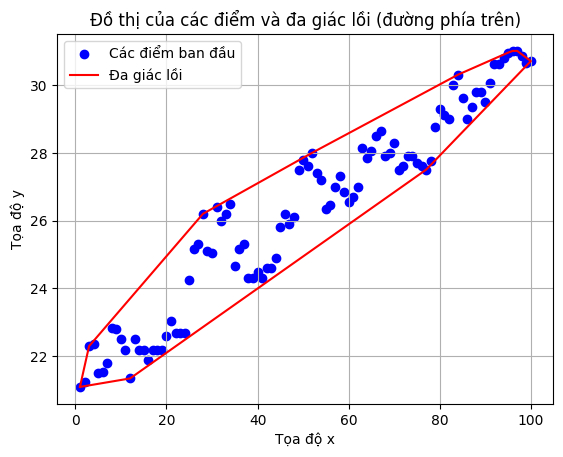

In [1]:
import matplotlib.pyplot as plt

# Hàm để kiểm tra hướng của 3 điểm: 1: ngược chiều kim đồng hồ, -1: theo chiều kim đồng hồ, 0: thẳng hàng
def orientation(p1, p2, p3):
    val = (p2['y'] - p1['y']) * (p3['x'] - p2['x']) - (p2['x'] - p1['x']) * (p3['y'] - p2['y'])
    if val == 0:
        return 0  # Thẳng hàng
    return 1 if val > 0 else -1  # Ngược chiều kim đồng hồ hoặc theo chiều kim đồng hồ

# Hàm để thực hiện thuật toán Jarvis March
def convex_hull(points):
    n = len(points)
    if n < 3:
        return []  # Cần ít nhất 3 điểm để tạo thành đa giác lồi

    # Tìm điểm nằm trên cùng của đa giác lồi (điểm bắt đầu)
    start = 0
    for i in range(1, n):
        if points[i]['x'] < points[start]['x']:
            start = i

    convex_points = []
    current = start

    while True:
        convex_points.append(points[current])
        next_point = (current + 1) % n

        for i in range(n):
            if orientation(points[current], points[i], points[next_point]) == -1:
                next_point = i

        current = next_point
        if current == start:
            break

    return convex_points

# Ví dụ sử dụng
points = [
{'x':1,'y':21.1},
{'x':2,'y':21.25,},
{'x':3,'y':22.3},
{'x':4,'y':22.35},
{'x':5,'y':21.5},
{'x':6,'y':21.55},
{'x':7,'y':21.8},
{'x':8,'y':22.85},
{'x':9,'y':22.8},
{'x':10,'y':22.5},
{'x':11,'y':22.2,},
{'x':12,'y':21.35},
{'x':13,'y':22.5},
{'x':14,'y':22.2},
{'x':15,'y':22.2},
{'x':16,'y':21.9},
{'x':17,'y':22.2},
{'x':18,'y':22.2},
{'x':19,'y':22.2},
{'x':20,'y':22.6,},
{'x':21,'y':23.05},
{'x':22,'y':22.7},
{'x':23,'y':22.7},
{'x':24,'y':22.7},
{'x':25,'y':24.25},
{'x':26,'y':25.15},
{'x':27,'y':25.3},
{'x':28,'y':26.2},
{'x':29,'y':25.1,},
{'x':30,'y':25.05},
{'x':31,'y':26.4},
{'x':32,'y':26},
{'x':33,'y':26.2},
{'x':34,'y':26.5},
{'x':35,'y':24.65},
{'x':36,'y':25.15},
{'x':37,'y':25.3},
{'x':38,'y':24.3,},
{'x':39,'y':24.3},
{'x':40,'y':24.5},
{'x':41,'y':24.3},
{'x':42,'y':24.6},
{'x':43,'y':24.6},
{'x':44,'y':24.9},
{'x':45,'y':25.8},
{'x':46,'y':26.2},
{'x':47,'y':25.9,},
{'x':48,'y':26.1},
{'x':49,'y':27.5},
{'x':50,'y':27.8},
{'x':51,'y':27.6},
{'x':52,'y':28},
{'x':53,'y':27.4},
{'x':54,'y':27.2},
{'x':55,'y':26.35},
{'x':56,'y':26.45,},
{'x':57,'y':27},
{'x':58,'y':27.3},
{'x':59,'y':26.85},
{'x':60,'y':26.55},
{'x':61,'y':26.7},
{'x':62,'y':27},
{'x':63,'y':28.15},
{'x':64,'y':27.85},
{'x':65,'y':28.05,},
{'x':66,'y':28.5},
{'x':67,'y':28.65},
{'x':68,'y':27.9},
{'x':69,'y':28},
{'x':70,'y':28.3},
{'x':71,'y':27.5},
{'x':72,'y':27.6},
{'x':73,'y':27.9},
{'x':74,'y':27.9,},
{'x':75,'y':27.7},
{'x':76,'y':27.6},
{'x':77,'y':27.5},
{'x':78,'y':27.75},
{'x':79,'y':28.75},
{'x':80,'y':29.3},
{'x':81,'y':29.1},
{'x':82,'y':29},
{'x':83,'y':30,},
{'x':84,'y':30.3},
{'x':85,'y':29.6},
{'x':86,'y':29},
{'x':87,'y':29.35},
{'x':88,'y':29.8},
{'x':89,'y':29.8},
{'x':90,'y':29.5},
{'x':91,'y':30.05},
{'x':92,'y':30.6,},
{'x':93,'y':30.6},
{'x':94,'y':30.8},
{'x':95,'y':30.95},
{'x':96,'y':31},
{'x':97,'y':31},
{'x':98,'y':30.85},
{'x':99,'y':30.65},
{'x':100,'y':30.7},
]

convex_hull_points = convex_hull(points)

# Tách tọa độ x và y của các điểm trong đa giác lồi
convex_x = [point['x'] for point in convex_hull_points]
convex_y = [point['y'] for point in convex_hull_points]

# Tách tọa độ x và y của các điểm ban đầu
x = [point['x'] for point in points]
y = [point['y'] for point in points]

# Vẽ các điểm ban đầu
plt.scatter(x, y, color='blue', label='Các điểm ban đầu')

# Vẽ đa giác lồi (đường phía trên)
plt.plot(convex_x + [convex_x[0]], convex_y + [convex_y[0]], color='red', label='Đa giác lồi')

plt.xlabel('Tọa độ x')
plt.ylabel('Tọa độ y')
plt.title('Đồ thị của các điểm và đa giác lồi (đường phía trên)')
plt.legend()
plt.grid(True)
plt.show()

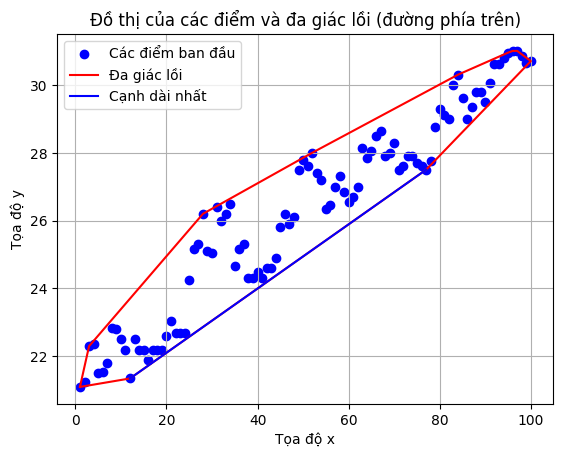

In [3]:
import matplotlib.pyplot as plt

# Hàm để kiểm tra hướng của 3 điểm: 1: ngược chiều kim đồng hồ, -1: theo chiều kim đồng hồ, 0: thẳng hàng
def orientation(p1, p2, p3):
    val = (p2['y'] - p1['y']) * (p3['x'] - p2['x']) - (p2['x'] - p1['x']) * (p3['y'] - p2['y'])
    if val == 0:
        return 0  # Thẳng hàng
    return 1 if val > 0 else -1  # Ngược chiều kim đồng hồ hoặc theo chiều kim đồng hồ

# Hàm để tính khoảng cách giữa hai điểm
def distance(p1, p2):
    return ((p2['x'] - p1['x'])**2 + (p2['y'] - p1['y'])**2)**0.5

# Hàm để thực hiện thuật toán Jarvis March
def convex_hull(points):
    n = len(points)
    if n < 3:
        return []  # Cần ít nhất 3 điểm để tạo thành đa giác lồi

    # Tìm điểm nằm trên cùng của đa giác lồi (điểm bắt đầu)
    start = 0
    for i in range(1, n):
        if points[i]['x'] < points[start]['x']:
            start = i

    convex_points = []
    current = start

    while True:
        convex_points.append(points[current])
        next_point = (current + 1) % n

        for i in range(n):
            if orientation(points[current], points[i], points[next_point]) == -1:
                next_point = i

        current = next_point
        if current == start:
            break

    return convex_points

# Ví dụ sử dụng
points = [
{'x':1,'y':21.1},
{'x':2,'y':21.25,},
{'x':3,'y':22.3},
{'x':4,'y':22.35},
{'x':5,'y':21.5},
{'x':6,'y':21.55},
{'x':7,'y':21.8},
{'x':8,'y':22.85},
{'x':9,'y':22.8},
{'x':10,'y':22.5},
{'x':11,'y':22.2,},
{'x':12,'y':21.35},
{'x':13,'y':22.5},
{'x':14,'y':22.2},
{'x':15,'y':22.2},
{'x':16,'y':21.9},
{'x':17,'y':22.2},
{'x':18,'y':22.2},
{'x':19,'y':22.2},
{'x':20,'y':22.6,},
{'x':21,'y':23.05},
{'x':22,'y':22.7},
{'x':23,'y':22.7},
{'x':24,'y':22.7},
{'x':25,'y':24.25},
{'x':26,'y':25.15},
{'x':27,'y':25.3},
{'x':28,'y':26.2},
{'x':29,'y':25.1,},
{'x':30,'y':25.05},
{'x':31,'y':26.4},
{'x':32,'y':26},
{'x':33,'y':26.2},
{'x':34,'y':26.5},
{'x':35,'y':24.65},
{'x':36,'y':25.15},
{'x':37,'y':25.3},
{'x':38,'y':24.3,},
{'x':39,'y':24.3},
{'x':40,'y':24.5},
{'x':41,'y':24.3},
{'x':42,'y':24.6},
{'x':43,'y':24.6},
{'x':44,'y':24.9},
{'x':45,'y':25.8},
{'x':46,'y':26.2},
{'x':47,'y':25.9,},
{'x':48,'y':26.1},
{'x':49,'y':27.5},
{'x':50,'y':27.8},
{'x':51,'y':27.6},
{'x':52,'y':28},
{'x':53,'y':27.4},
{'x':54,'y':27.2},
{'x':55,'y':26.35},
{'x':56,'y':26.45,},
{'x':57,'y':27},
{'x':58,'y':27.3},
{'x':59,'y':26.85},
{'x':60,'y':26.55},
{'x':61,'y':26.7},
{'x':62,'y':27},
{'x':63,'y':28.15},
{'x':64,'y':27.85},
{'x':65,'y':28.05,},
{'x':66,'y':28.5},
{'x':67,'y':28.65},
{'x':68,'y':27.9},
{'x':69,'y':28},
{'x':70,'y':28.3},
{'x':71,'y':27.5},
{'x':72,'y':27.6},
{'x':73,'y':27.9},
{'x':74,'y':27.9,},
{'x':75,'y':27.7},
{'x':76,'y':27.6},
{'x':77,'y':27.5},
{'x':78,'y':27.75},
{'x':79,'y':28.75},
{'x':80,'y':29.3},
{'x':81,'y':29.1},
{'x':82,'y':29},
{'x':83,'y':30,},
{'x':84,'y':30.3},
{'x':85,'y':29.6},
{'x':86,'y':29},
{'x':87,'y':29.35},
{'x':88,'y':29.8},
{'x':89,'y':29.8},
{'x':90,'y':29.5},
{'x':91,'y':30.05},
{'x':92,'y':30.6,},
{'x':93,'y':30.6},
{'x':94,'y':30.8},
{'x':95,'y':30.95},
{'x':96,'y':31},
{'x':97,'y':31},
{'x':98,'y':30.85},
{'x':99,'y':30.65},
{'x':100,'y':30.7},
]

convex_hull_points = convex_hull(points)

# Tách tọa độ x và y của các điểm trong đa giác lồi
convex_x = [point['x'] for point in convex_hull_points]
convex_y = [point['y'] for point in convex_hull_points]

# Tách tọa độ x và y của các điểm ban đầu
x = [point['x'] for point in points]
y = [point['y'] for point in points]

# Vẽ các điểm ban đầu
plt.scatter(x, y, color='blue', label='Các điểm ban đầu')

# Vẽ đa giác lồi (đường phía trên)
plt.plot(convex_x + [convex_x[0]], convex_y + [convex_y[0]], color='red', label='Đa giác lồi')

# Tìm cạnh dài nhất trong đa giác
longest_edge = None
max_distance = 0

for i in range(len(convex_hull_points)):
    edge_distance = distance(convex_hull_points[i], convex_hull_points[(i+1) % len(convex_hull_points)])
    if edge_distance > max_distance:
        max_distance = edge_distance
        longest_edge = (convex_hull_points[i], convex_hull_points[(i+1) % len(convex_hull_points)])

# Vẽ lại cạnh dài nhất màu đỏ
if longest_edge:
    plt.plot([longest_edge[0]['x'], longest_edge[1]['x']], [longest_edge[0]['y'], longest_edge[1]['y']], color='blue', label='Cạnh dài nhất')

plt.xlabel('Tọa độ x')
plt.ylabel('Tọa độ y')
plt.title('Đồ thị của các điểm và đa giác lồi (đường phía trên)')
plt.legend()
plt.grid(True)
plt.show()


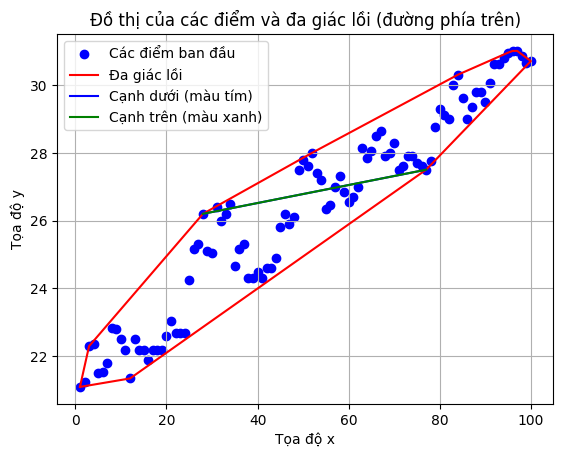

In [5]:
import matplotlib.pyplot as plt

# Hàm để kiểm tra hướng của 3 điểm: 1: ngược chiều kim đồng hồ, -1: theo chiều kim đồng hồ, 0: thẳng hàng
def orientation(p1, p2, p3):
    val = (p2['y'] - p1['y']) * (p3['x'] - p2['x']) - (p2['x'] - p1['x']) * (p3['y'] - p2['y'])
    if val == 0:
        return 0  # Thẳng hàng
    return 1 if val > 0 else -1  # Ngược chiều kim đồng hồ hoặc theo chiều kim đồng hồ

# Hàm để thực hiện thuật toán Jarvis March
def convex_hull(points):
    n = len(points)
    if n < 3:
        return []  # Cần ít nhất 3 điểm để tạo thành đa giác lồi

    # Tìm điểm nằm trên cùng của đa giác lồi (điểm bắt đầu)
    start = 0
    for i in range(1, n):
        if points[i]['x'] < points[start]['x']:
            start = i

    convex_points = []
    current = start

    while True:
        convex_points.append(points[current])
        next_point = (current + 1) % n

        for i in range(n):
            if orientation(points[current], points[i], points[next_point]) == -1:
                next_point = i

        current = next_point
        if current == start:
            break

    return convex_points

# Hàm để tính khoảng cách giữa hai điểm
def distance(p1, p2):
    return ((p2['x'] - p1['x'])**2 + (p2['y'] - p1['y'])**2)**0.5

# Ví dụ sử dụng
points = [
{'x':1,'y':21.1},
{'x':2,'y':21.25,},
{'x':3,'y':22.3},
{'x':4,'y':22.35},
{'x':5,'y':21.5},
{'x':6,'y':21.55},
{'x':7,'y':21.8},
{'x':8,'y':22.85},
{'x':9,'y':22.8},
{'x':10,'y':22.5},
{'x':11,'y':22.2,},
{'x':12,'y':21.35},
{'x':13,'y':22.5},
{'x':14,'y':22.2},
{'x':15,'y':22.2},
{'x':16,'y':21.9},
{'x':17,'y':22.2},
{'x':18,'y':22.2},
{'x':19,'y':22.2},
{'x':20,'y':22.6,},
{'x':21,'y':23.05},
{'x':22,'y':22.7},
{'x':23,'y':22.7},
{'x':24,'y':22.7},
{'x':25,'y':24.25},
{'x':26,'y':25.15},
{'x':27,'y':25.3},
{'x':28,'y':26.2},
{'x':29,'y':25.1,},
{'x':30,'y':25.05},
{'x':31,'y':26.4},
{'x':32,'y':26},
{'x':33,'y':26.2},
{'x':34,'y':26.5},
{'x':35,'y':24.65},
{'x':36,'y':25.15},
{'x':37,'y':25.3},
{'x':38,'y':24.3,},
{'x':39,'y':24.3},
{'x':40,'y':24.5},
{'x':41,'y':24.3},
{'x':42,'y':24.6},
{'x':43,'y':24.6},
{'x':44,'y':24.9},
{'x':45,'y':25.8},
{'x':46,'y':26.2},
{'x':47,'y':25.9,},
{'x':48,'y':26.1},
{'x':49,'y':27.5},
{'x':50,'y':27.8},
{'x':51,'y':27.6},
{'x':52,'y':28},
{'x':53,'y':27.4},
{'x':54,'y':27.2},
{'x':55,'y':26.35},
{'x':56,'y':26.45,},
{'x':57,'y':27},
{'x':58,'y':27.3},
{'x':59,'y':26.85},
{'x':60,'y':26.55},
{'x':61,'y':26.7},
{'x':62,'y':27},
{'x':63,'y':28.15},
{'x':64,'y':27.85},
{'x':65,'y':28.05,},
{'x':66,'y':28.5},
{'x':67,'y':28.65},
{'x':68,'y':27.9},
{'x':69,'y':28},
{'x':70,'y':28.3},
{'x':71,'y':27.5},
{'x':72,'y':27.6},
{'x':73,'y':27.9},
{'x':74,'y':27.9,},
{'x':75,'y':27.7},
{'x':76,'y':27.6},
{'x':77,'y':27.5},
{'x':78,'y':27.75},
{'x':79,'y':28.75},
{'x':80,'y':29.3},
{'x':81,'y':29.1},
{'x':82,'y':29},
{'x':83,'y':30,},
{'x':84,'y':30.3},
{'x':85,'y':29.6},
{'x':86,'y':29},
{'x':87,'y':29.35},
{'x':88,'y':29.8},
{'x':89,'y':29.8},
{'x':90,'y':29.5},
{'x':91,'y':30.05},
{'x':92,'y':30.6,},
{'x':93,'y':30.6},
{'x':94,'y':30.8},
{'x':95,'y':30.95},
{'x':96,'y':31},
{'x':97,'y':31},
{'x':98,'y':30.85},
{'x':99,'y':30.65},
{'x':100,'y':30.7},
]

convex_hull_points = convex_hull(points)

# Sắp xếp các điểm trên đa giác theo tọa độ y tăng dần
sorted_points = sorted(convex_hull_points, key=lambda point: point['y'])

# Tách tọa độ x và y của các điểm trong đa giác lồi
convex_x = [point['x'] for point in convex_hull_points]
convex_y = [point['y'] for point in convex_hull_points]

# Tách tọa độ x và y của các điểm ban đầu
x = [point['x'] for point in points]
y = [point['y'] for point in points]

# Vẽ các điểm ban đầu
plt.scatter(x, y, color='blue', label='Các điểm ban đầu')

# Vẽ đa giác lồi (đường phía trên)
plt.plot(convex_x + [convex_x[0]], convex_y + [convex_y[0]], color='red', label='Đa giác lồi')

# Tìm cạnh dài nhất nằm phía dưới (màu tím)
longest_edge_below = distance(sorted_points[0], sorted_points[1])
longest_edge_below_points = (sorted_points[0], sorted_points[1])

for i in range(1, len(sorted_points)-1):
    edge_distance = distance(sorted_points[i], sorted_points[i+1])
    if edge_distance > longest_edge_below:
        longest_edge_below = edge_distance
        longest_edge_below_points = (sorted_points[i], sorted_points[i+1])

# Tìm cạnh dài nhất nằm phía trên (màu xanh)
longest_edge_above = distance(sorted_points[-1], sorted_points[-2])
longest_edge_above_points = (sorted_points[-1], sorted_points[-2])

for i in range(len(sorted_points)-2, 0, -1):
    edge_distance = distance(sorted_points[i], sorted_points[i-1])
    if edge_distance > longest_edge_above:
        longest_edge_above = edge_distance
        longest_edge_above_points = (sorted_points[i], sorted_points[i-1])

# Vẽ lại cạnh dài nhất nằm phía dưới (màu tím)
plt.plot([longest_edge_below_points[0]['x'], longest_edge_below_points[1]['x']],
         [longest_edge_below_points[0]['y'], longest_edge_below_points[1]['y']], color='blue', label='Cạnh dưới (màu tím)')

# Vẽ lại cạnh dài nhất nằm phía trên (màu xanh)
plt.plot([longest_edge_above_points[0]['x'], longest_edge_above_points[1]['x']],
         [longest_edge_above_points[0]['y'], longest_edge_above_points[1]['y']], color='green', label='Cạnh trên (màu xanh)')

plt.xlabel('Tọa độ x')
plt.ylabel('Tọa độ y')
plt.title('Đồ thị của các điểm và đa giác lồi (đường phía trên)')
plt.legend()
plt.grid(True)
plt.show()
